In [ ]:
1. 결측치 처리 (지역, 업종) : 일단 삭제하지 않기로
2. 데이터 타입 변경: date, time
3. 시각화
    - 변수끼리, 변수와 목적변수의 상관관계

### 1. 문제 정의
- **분석목적**: 2년간의 카드거래 데이터를 이용해 2019-03-01부터 2019-05-31까지의 각 상점별 3개월 **총 매출** 예측 
- **가설수립**
    - 할부 개월 수가 높을수록 매출이 높을 것이다
    - 주말 및 공휴일에 매출이 높을 것이다
    - 평일 점심시간과 퇴근 시간 이후(6시 이후) 매출이 높을 것이다
    - 업종별 매출이 높은 요일이 다를 것이다
    - 시의 인구밀도가 높을수록 매출이 높을 것이다 

### 2. 데이터 수집
- dacon 9회 펀다 상점 매출 예측

- store_id: 상점 고유 아이디
- card_id: 사용한 카드의 고유 아이디
- card_company: 비식별화된 카드 회사
- trasacted_date: 거래 날짜
- trasacted_time: 거래 시간(시:분)
- installment_term: 할부 개월 수(포인트 사용 시 (60개월+실제할부개월)을 할부 개월수에 기재한다)
- region: 상점의 지역
- type_of_business: 상점의 업종 
- amount: 거래액(단위는 원이 아니다)

In [1]:
df = pd.read_csv("funda_train.csv")
df.tail(1)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
6556612,2136,4658616,c,2019-02-28,23:54,0,제주 제주시,기타 주점업,5857.142857


### 3. 데이터 처리

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
store_id            int64
card_id             int64
card_company        object
transacted_date     object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [3]:
df.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


In [4]:
# len(pd.unique(df.store_id)) # 1967

In [5]:
# list(pd.unique(df.installment_term)) # 34

In [6]:
# list(pd.unique(df.card_company)) # 8

In [2]:
# len(pd.unique(df.card_id))

In [8]:
# list(pd.unique(df.region)) # 181

In [9]:
# list(pd.unique(df.type_of_business)) #146

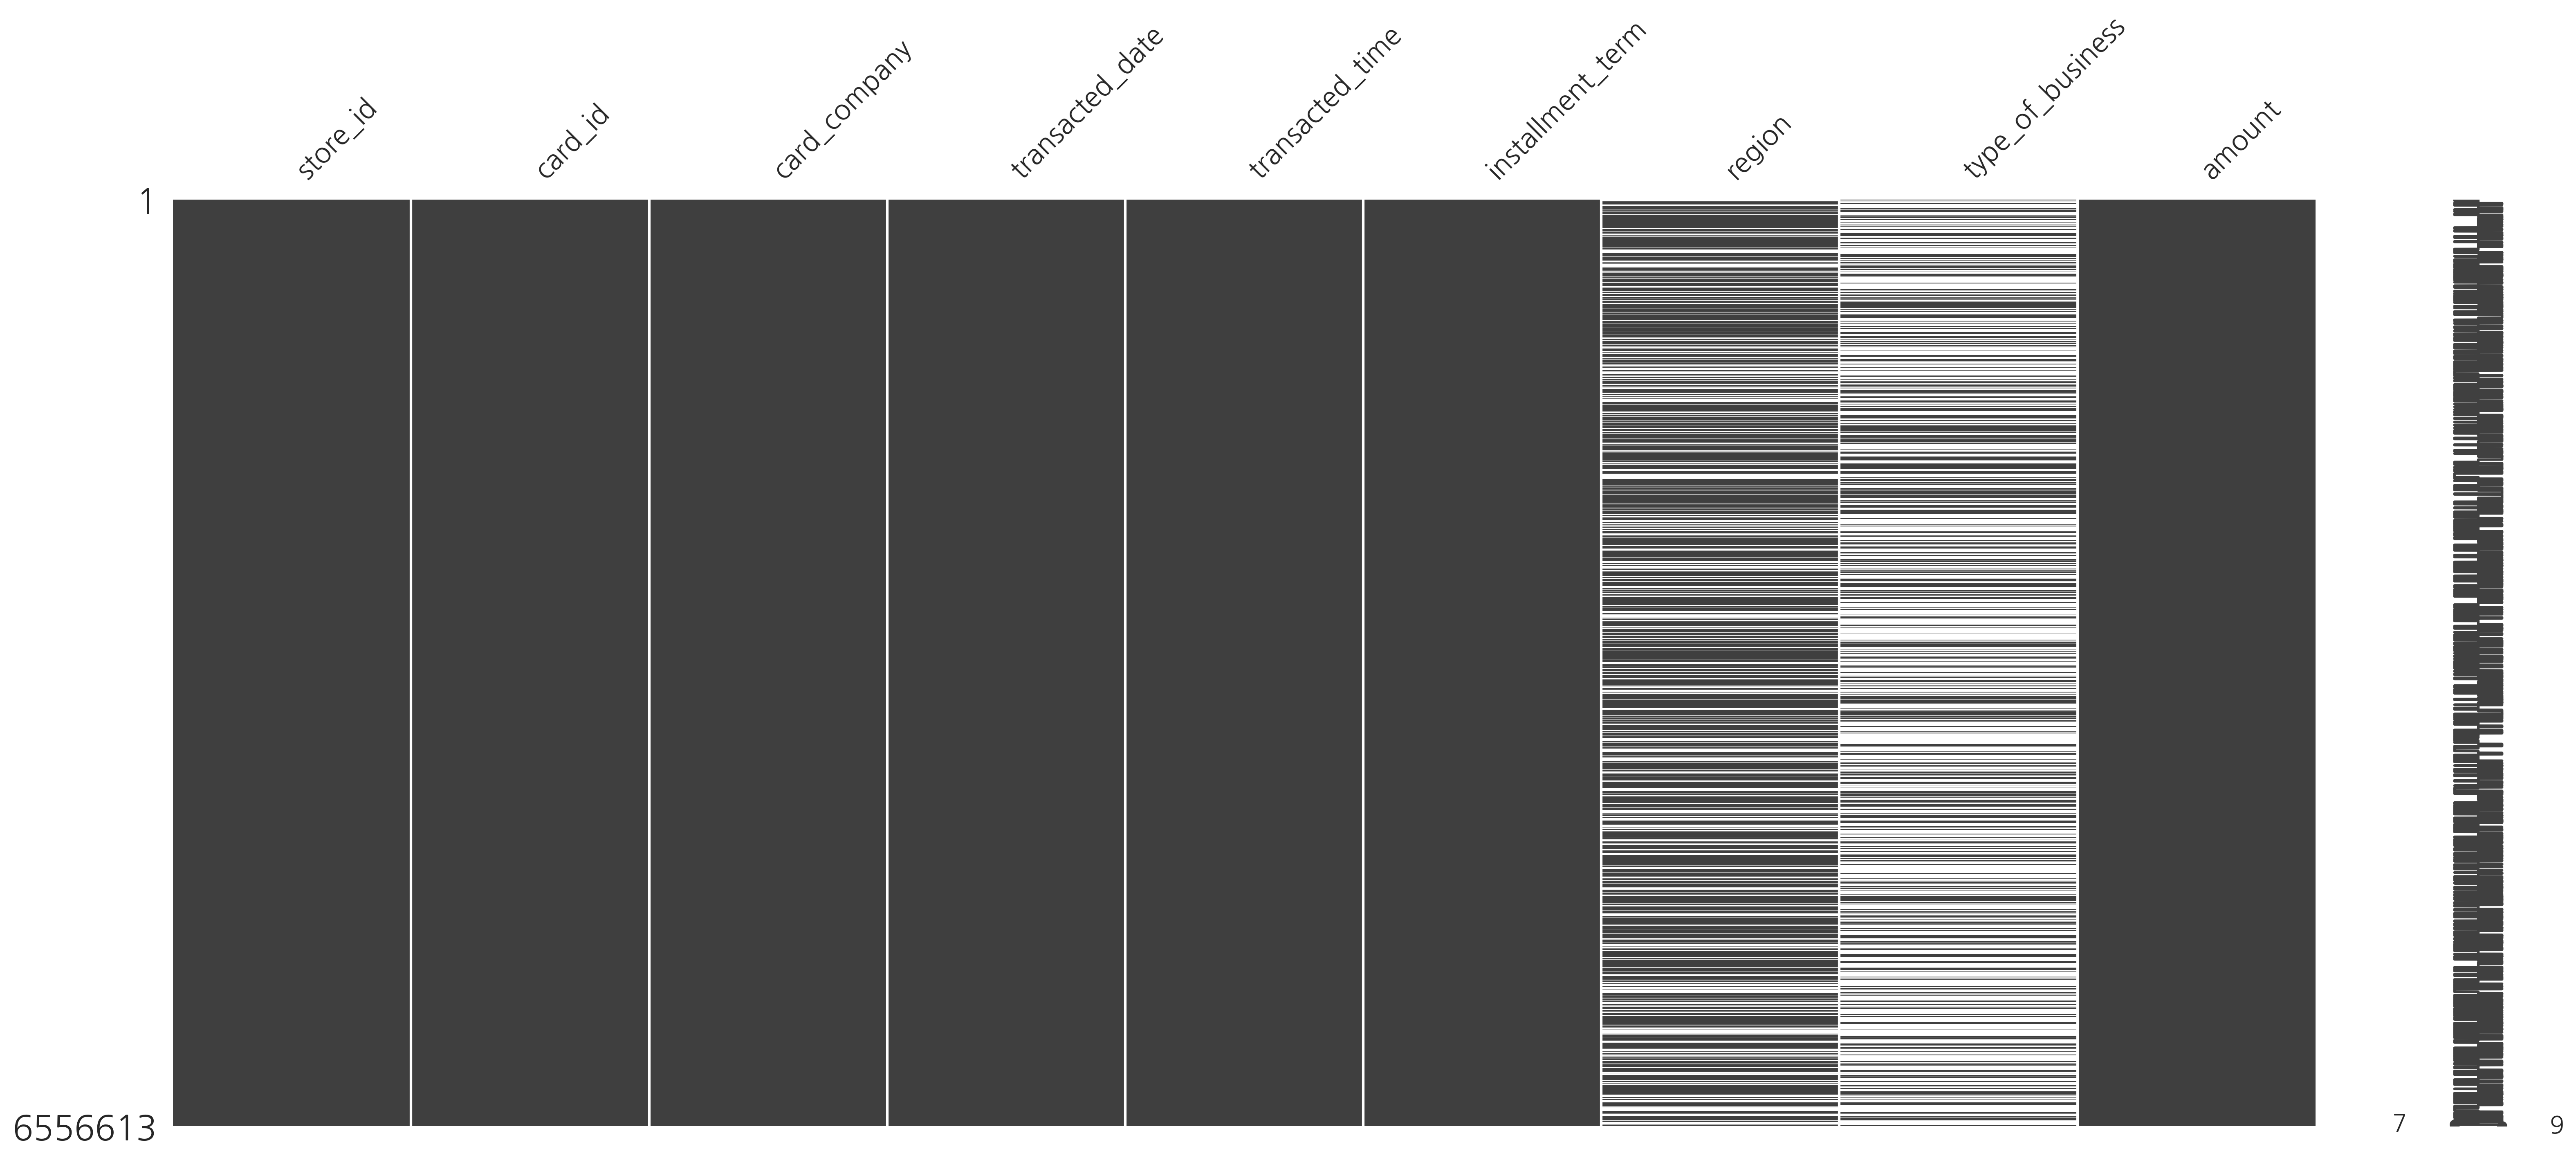

In [10]:
import missingno as msno

msno.matrix(df)
plt.show()

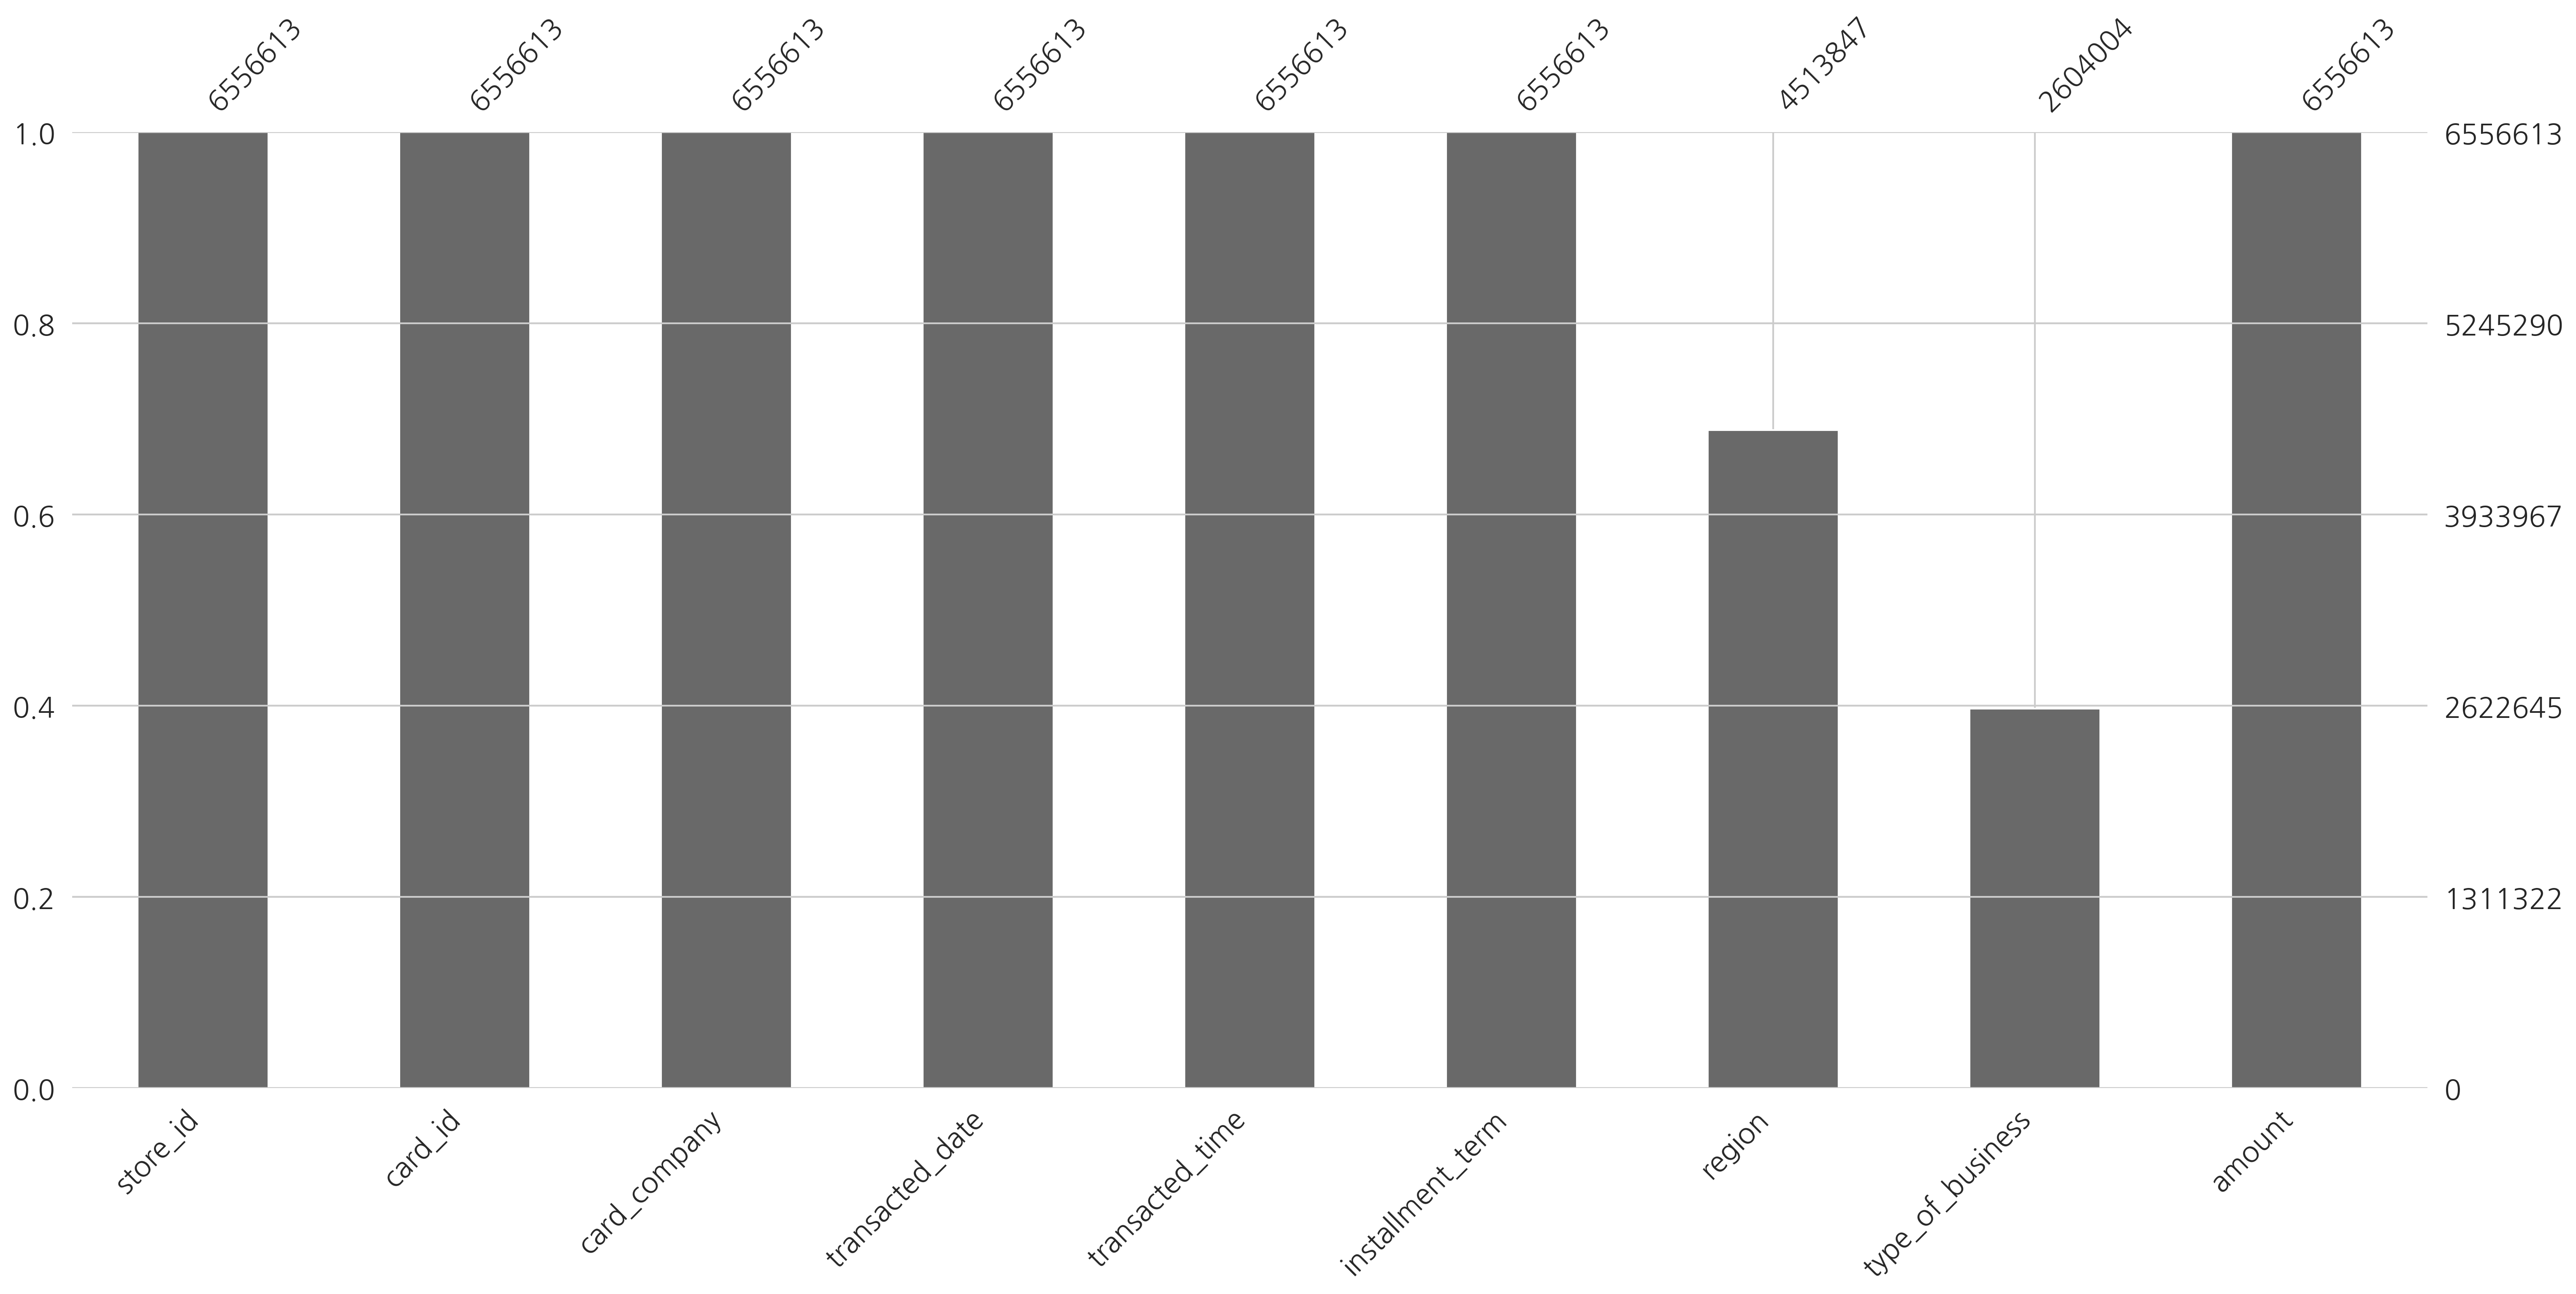

In [52]:
msno.bar(df)
plt.show()

- region과 type-of-business에 결측치가 많지만, 매출과 상관이 있을지 모르니 삭제하지 않기로 함
- 숫자 데이터가 아니라서 결측치라고 삭제하지 않아도 되는건가?

In [74]:
df.tail(1)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
6556612,2136,4658616,c,2019-02-28,23:54,0,제주 제주시,기타 주점업,5857.142857


In [23]:
# 시계열 인코딩
from datetime import datetime

In [3]:
date_time = df['transacted_date']+' '+df['transacted_time']
date_time

0          2016-06-01 13:13
1          2016-06-01 18:12
2          2016-06-01 18:52
3          2016-06-01 20:22
4          2016-06-02 11:06
                 ...       
6556608    2019-02-28 23:20
6556609    2019-02-28 23:24
6556610    2019-02-28 23:24
6556611    2019-02-28 23:27
6556612    2019-02-28 23:54
Length: 6556613, dtype: object

In [4]:
df['transacted_dt'] = pd.to_datetime(date_time) 
df.tail(2)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,transacted_dt
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00
6556612,2136,4658616,c,2019-02-28,23:54,0,제주 제주시,기타 주점업,5857.142857,2019-02-28 23:54:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 10 columns):
store_id            int64
card_id             int64
card_company        object
transacted_date     object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
transacted_dt       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 500.2+ MB


In [6]:
# transacted_date, transacted_time 열 삭제
df.drop(['transacted_date', 'transacted_time'], axis='columns', inplace=True)
df.tail(2)

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_dt
6556611,2136,4663856,d,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00
6556612,2136,4658616,c,0,제주 제주시,기타 주점업,5857.142857,2019-02-28 23:54:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 8 columns):
store_id            int64
card_id             int64
card_company        object
installment_term    int64
region              object
type_of_business    object
amount              float64
transacted_dt       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 400.2+ MB


In [33]:
# 월, 일, 시간, 요일
df['month'] = df['transacted_dt'].dt.month
df['day'] = df['transacted_dt'].dt.day
df['hour'] = df['transacted_dt'].dt.hour
df['week'] = df['transacted_dt'].dt.dayofweek
df.tail(2)
# 월 0, 화 1, 수 2, 목 3, 금 4, 토요일 5, 일요일 6

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_dt,month,day,hour,week,date
6556611,2136,4663856,d,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00,2,28,23,3,2019-02-28 23:27:00
6556612,2136,4658616,c,0,제주 제주시,기타 주점업,5857.142857,2019-02-28 23:54:00,2,28,23,3,2019-02-28 23:54:00


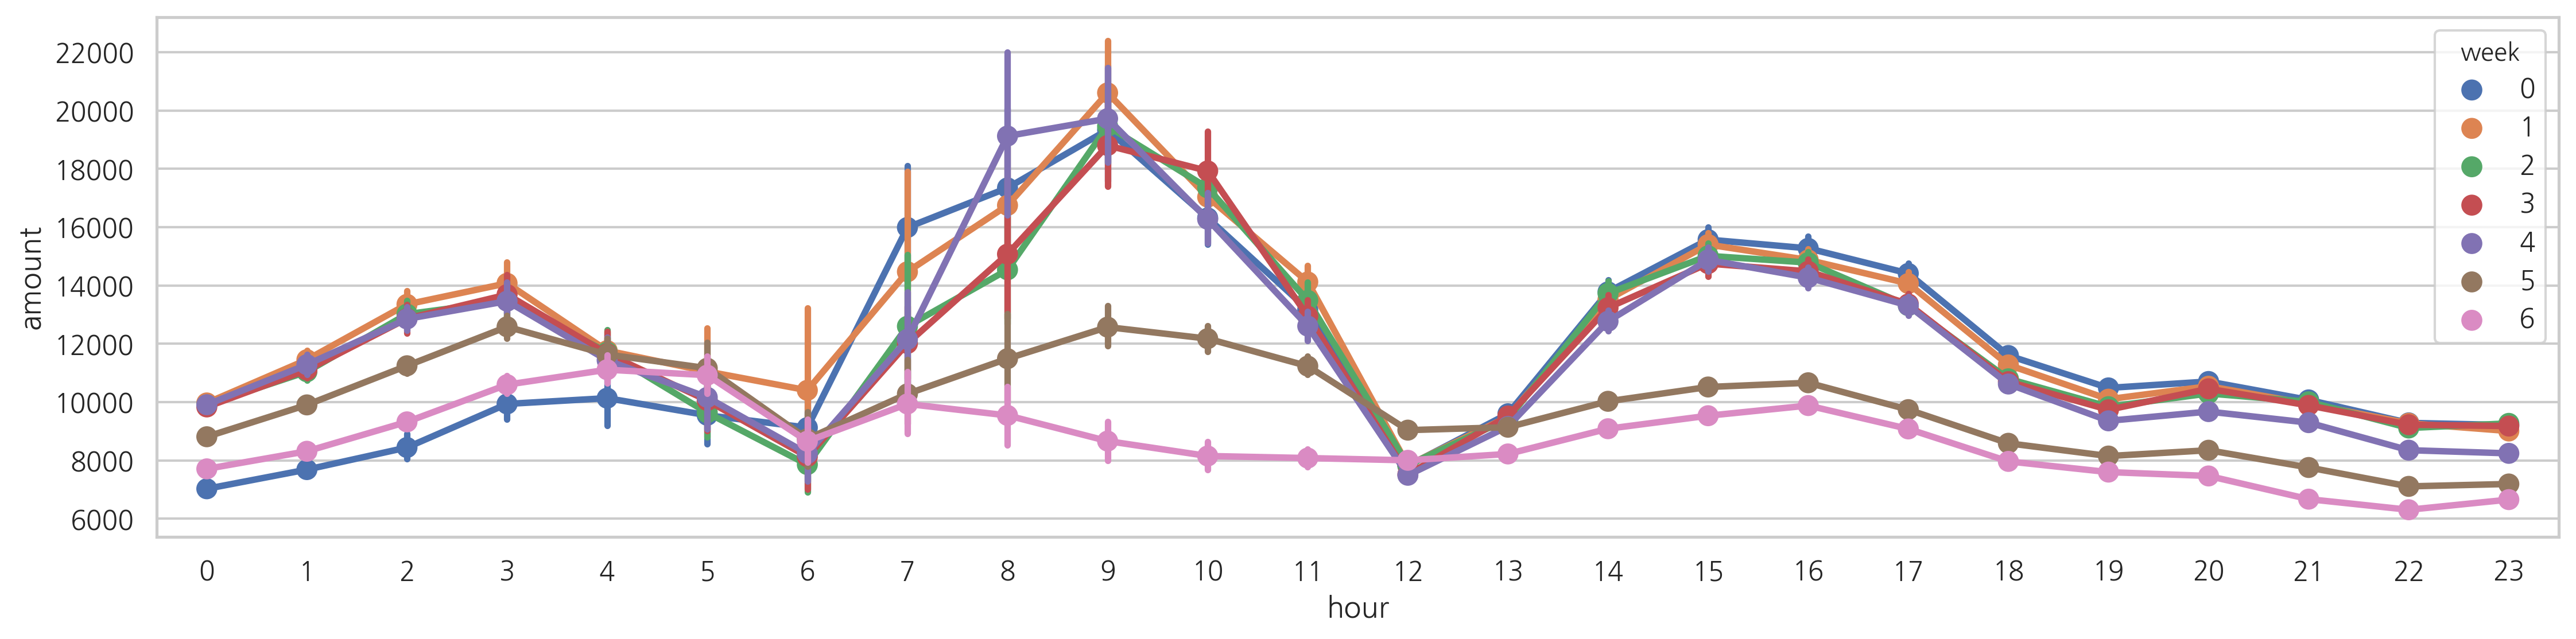

In [35]:
plt.figure(figsize=(18, 4))
week_order = [0, 1, 2, 3, 4, 5, 6]

sns.pointplot(data=df, x='hour', y='amount', hue='week', hue_order=week_order)

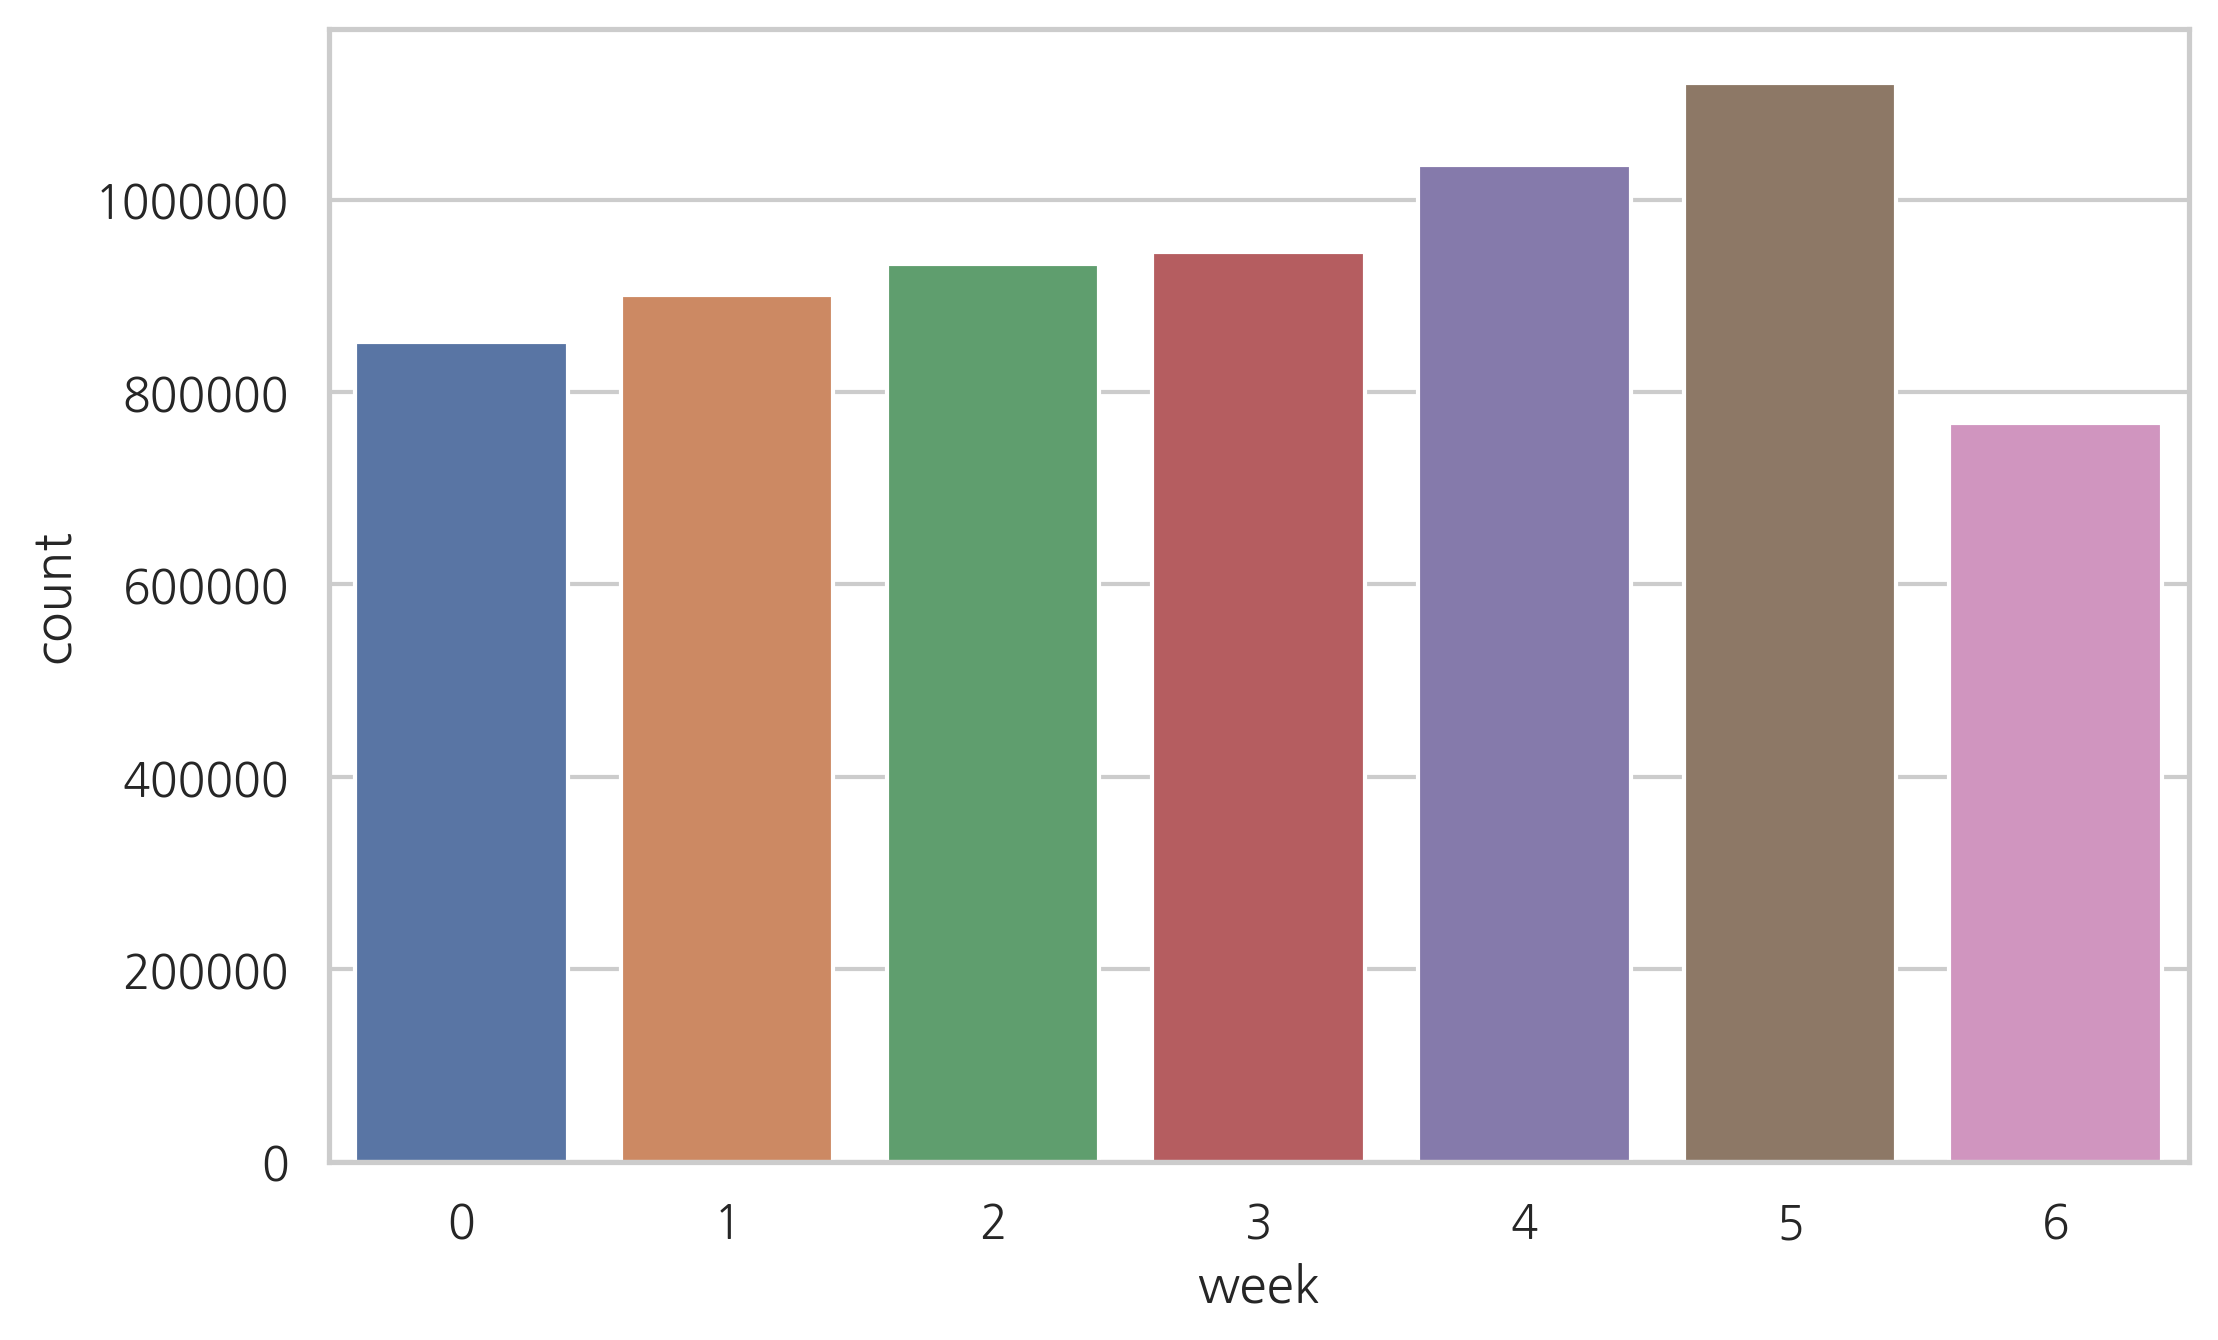

In [37]:
week_order = [0, 1, 2, 3, 4, 5, 6]

sns.countplot(x='week', data=df, order=week_order)

- 평일에 매출이 더 높다
    - 출근시간대, 오후시간
- 주말에는 예상보다 매출이 낮다
- **토요일 매출이 가장 높고, 일요일 매출이 가장 낮다**

In [ ]:
# 요일별 매출 통계랑

In [ ]:
# 공휴일에 매출이 영향을 미칠까? 하지말자 왜냐면 공휴일 수가 많지 않기 때문

In [20]:
df['month']

0         2016-06-01 13:13:00
1         2016-06-01 18:12:00
2         2016-06-01 18:52:00
3         2016-06-01 20:22:00
4         2016-06-02 11:06:00
                  ...        
6556608   2019-02-28 23:20:00
6556609   2019-02-28 23:24:00
6556610   2019-02-28 23:24:00
6556611   2019-02-28 23:27:00
6556612   2019-02-28 23:54:00
Name: transacted_dt, Length: 6556613, dtype: datetime64[ns]

In [29]:
df.tail(2)

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_dt,month,day,hour,week,date
6556611,2136,4663856,d,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00,2,28,23,Thursday,2019-02-28 23:27:00
6556612,2136,4658616,c,0,제주 제주시,기타 주점업,5857.142857,2019-02-28 23:54:00,2,28,23,Thursday,2019-02-28 23:54:00


In [30]:
df['week'] = df['transacted_dt'].dt.dayofweek
df.tail(2)

,store_id,card_id,card_company,installment_term,region,type_of_business,amount,transacted_dt,month,day,hour,week,date
6556611,2136,4663856,d,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00,2,28,23,3,2019-02-28 23:27:00
6556612,2136,4658616,c,0,제주 제주시,기타 주점업,5857.142857,2019-02-28 23:54:00,2,28,23,3,2019-02-28 23:54:00


In [42]:
# 데이터 간 상관관계 조회
df.corr()

,store_id,card_id,installment_term,amount,month,day,hour,week
store_id,1.000000,0.969906,-0.014859,-0.039063,-0.002663,0.001312,0.011602,0.022656
card_id,0.969906,1.000000,-0.013424,-0.038116,-0.002727,0.001013,0.011438,0.021735
installment_term,-0.014859,-0.013424,1.000000,0.212325,0.004589,0.003397,-0.002712,-0.012318
amount,-0.039063,-0.038116,0.212325,1.000000,-0.001678,0.010103,-0.014459,-0.031573
month,-0.002663,-0.002727,0.004589,-0.001678,1.000000,0.009546,-0.001859,0.014774
day,0.001312,0.001013,0.003397,0.010103,0.009546,1.000000,0.003987,-0.013045
hour,0.011602,0.011438,-0.002712,-0.014459,-0.001859,0.003987,1.000000,-0.067291
week,0.022656,0.021735,-0.012318,-0.031573,0.014774,-0.013045,-0.067291,1.000000


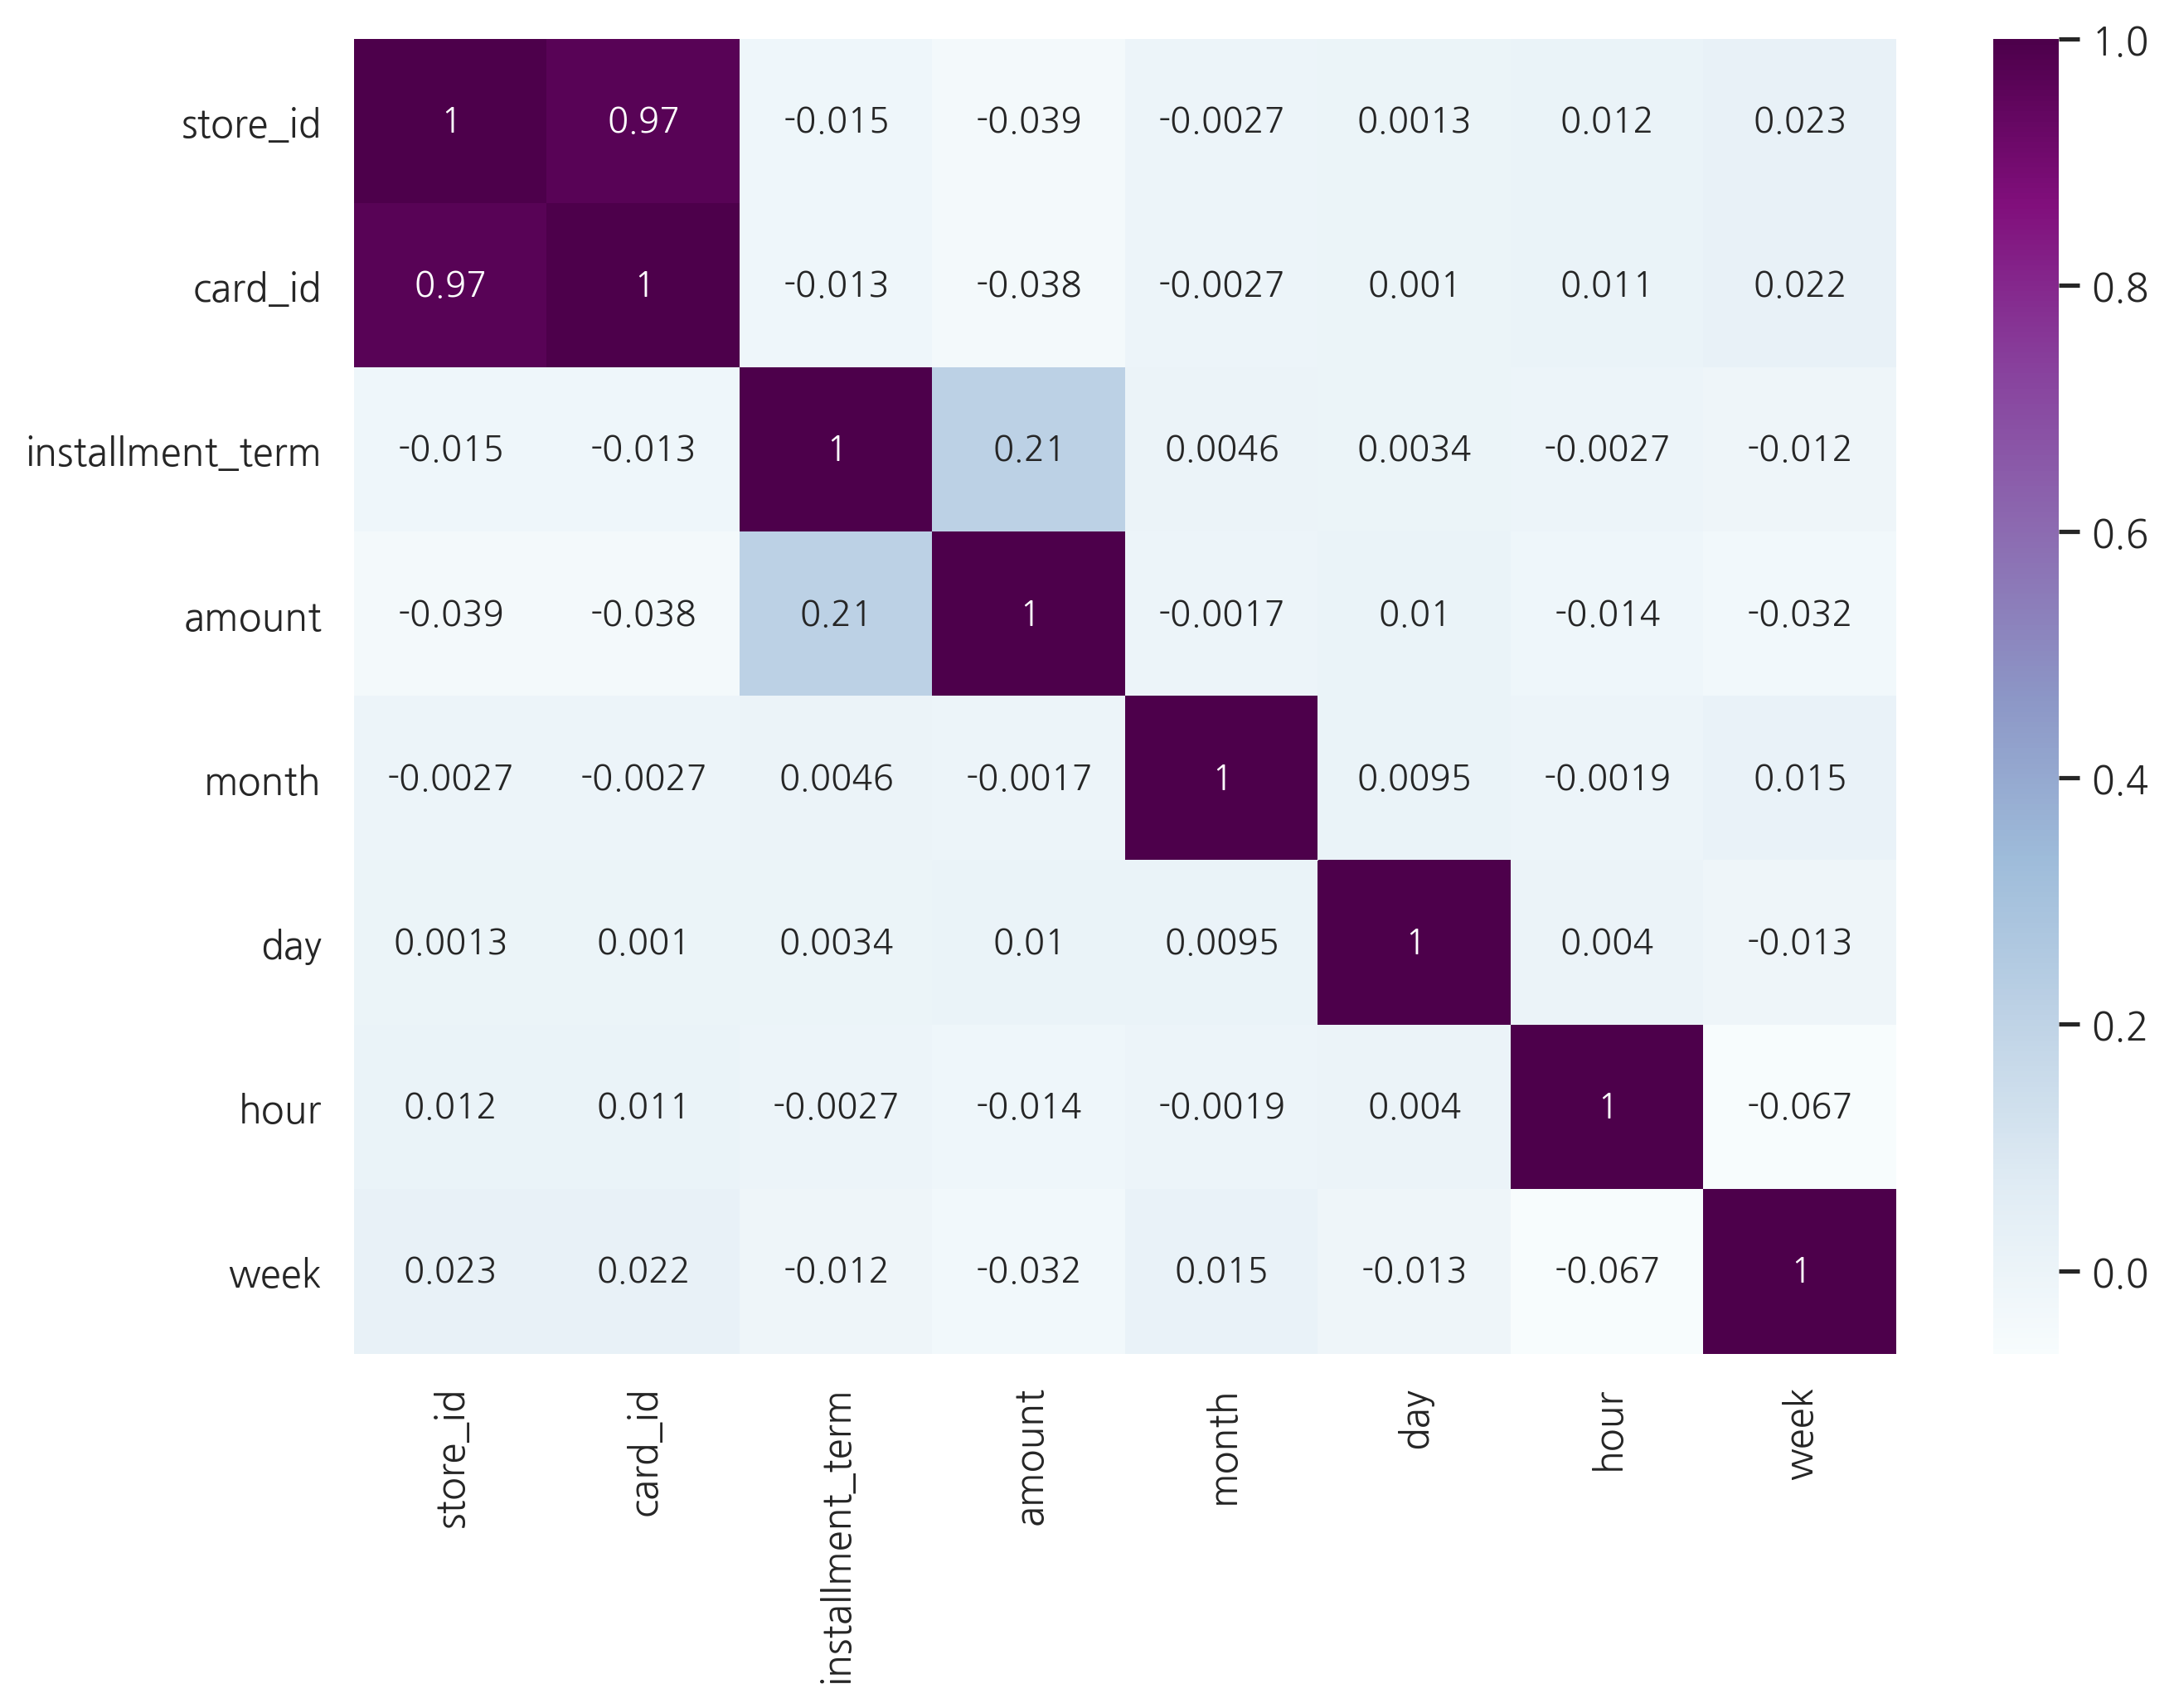

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.heatmap(df.corr(), cmap='BuPu', annot=True)

In [ ]:
# sns.pairplot(df)

## 내일(0220) 해야할 일
- 변수끼리, 변수와 목적변수의 상관관계를알아보기 위한 시각화
- week pointplot의  legend 이름 바꾸는거 찾아보기
- 그나마 할부개월수가 amount와 관계가 있는데, 그거를 처리해보자

In [ ]:
# 재방문고객, 중복되는 카드아이디로 조회할 수 있을 것 같지만 어떻게 하는지 모르겠다
#  할부개월수에 60이 더해진 데이터를 찾아서,(왜냐면 그들이 단골일 듯) 그 데이터의 카드넘버를 모아서 결제 횟수 column을 생성
# 재방문율이 높을수록 매출이 높을까?
# card_id별 amount를 더함